In [43]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import distributions as dist
import random
import pandas as pd
from sklearn.preprocessing import scale



In [2]:
def designMat(x):
    n = len(x)
    X = np.c_[np.ones(n), x, x**2, x**3, x**4,x**5, x**6]
    return(X)

In [35]:
def RidgeLS(X, Y ,λ):
    I = np.eye(7)
    I[0,0] = 0
    theta = np.linalg.inv((X.T.dot(X) + λ * I)).dot(X.T).dot(Y)
    return(theta)

In [36]:
n = 200
random.seed(123)
x = np.random.uniform(0,300,n)
x = x[np.argsort(x)]
y = 5 + x**1 + x**2 + x**3


In [37]:
random.seed(123)
y_obs = y + np.random.normal(0,900000, n)

x_train = x[x < 200]
x_test = x[x >= 200]

y_train = y_obs[x < 200]
y_test = y_obs[x >= 200]

n_train = len(x_train)
n_test = len(x_test)



In [38]:
x_train = designMat(x_train)
x_test = designMat(x_test)

In [39]:
testMSE = [] 

for λ in [0, 0.5, 10, 20, 30, 80, 100, 200]:
    
    theta = RidgeLS(x_train, y_train, λ)
    y_pred = theta[0]*x_test[:,0] + theta[1]*x_test[:,1] + theta[2]*x_test[:,2] + theta[3]*x_test[:,3] + theta[4]*x_test[:,4] + \
             theta[5]*x_test[:,5] + theta[6]*x_test[:,6] 
    mse = 1/(2*n)*np.sum(y_test - y_pred)**2
    testMSE.append(mse)

In [41]:
trainMSE = [] 

lambdas = [0, 0.5, 10, 20, 30, 80, 100, 200]

for λ in lambdas:
    
    theta = RidgeLS(x_train, y_train, λ)
    y_pred = theta[0]*x_train[:,0] + theta[1]*x_train[:,1] + theta[2]*x_train[:,2] + theta[3]*x_train[:,3] + theta[4]*x_train[:,4] + \
             theta[5]*x_train[:,5] + theta[6]*x_train[:,6] 
    mse = 1/(2*n)*np.sum(y_train - y_pred)**2
    trainMSE.append(mse)

In [61]:
testMSE = scale(testMSE)
trainMSE = scale(trainMSE)
Lambdas = scale([0, 0.5, 10, 20, 30, 80, 100, 200]) 
lambdas = [0, 0.5, 10, 20, 30, 80, 100, 200] 


table = {'lambdas': lambdas,
        'trainMSE':trainMSE,
        'testMSE':testMSE} 

dataFrame = pd.DataFrame(table) 

dataFrame['Maximum'] = dataFrame[['testMSE','trainMSE']].max(axis=1)
dataFrame

,lambdas,trainMSE,testMSE,Maximum
0,0.0,-0.544693,1.060231,1.060231
1,0.5,2.438494,1.043742,2.438494
2,10.0,-0.429755,0.748893,0.748893
3,20.0,-0.374109,0.472192,0.472192
4,30.0,-0.587213,0.224679,0.224679
5,80.0,-0.546304,-0.702610,-0.546304
6,100.0,0.649560,-0.973287,0.649560
7,200.0,-0.605980,-1.873840,-0.605980


As can be observed in the above table the maximum is at lambda= 0.50 and this can be calculated as follows:

In [64]:
dataFrame['Maximum'].max()

2.438494406240162

We can thus conclude that the larger the largest difference is found in 0.5 but there isnt a pattern that is followed . We can not say the bigger the lambda the larger the difference and this is shown by the table above

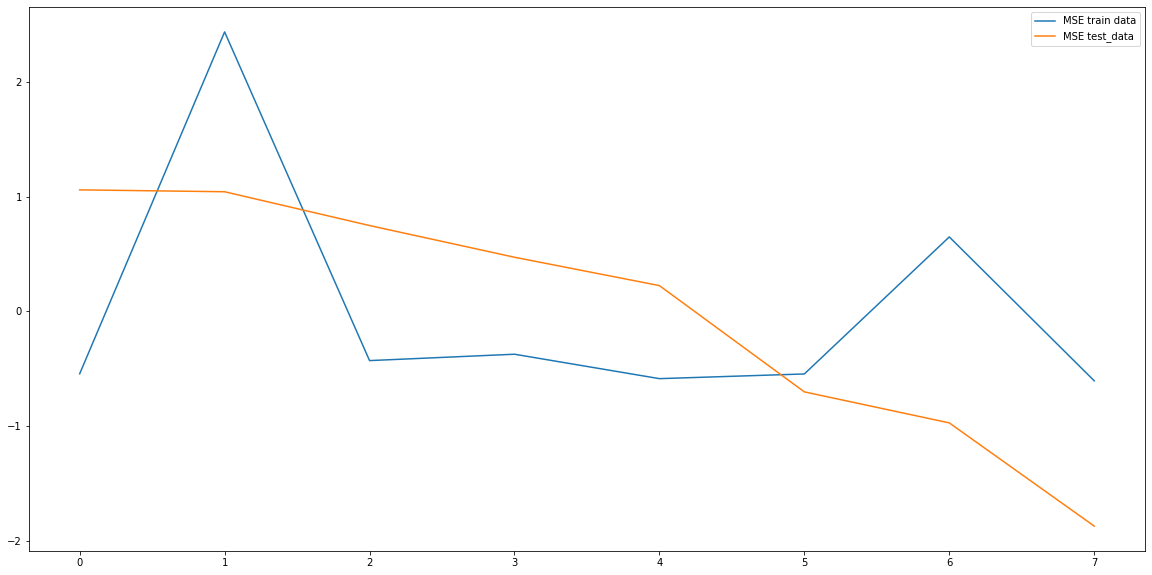

In [68]:
plt.figure(figsize=(20,10))
plt.plot(trainMSE, label='MSE train data')
plt.plot(testMSE, label='MSE test_data')
plt.legend()
plt.show()